In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_rec_date = session.query(func.max(Measurement.date)).first()
most_rec_date[0]

'2017-08-23'

In [10]:
# Import Datetime library inorder to perfomr date calculations
import datetime as dt
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# convert most recent date to datetime object
end_date = dt.datetime.strptime(most_rec_date[0], '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
start_date = end_date - relativedelta(years=1)

print(end_date, start_date, sep='|')

2017-08-23|2016-08-23


In [18]:
# Perform a query to retrieve the data and precipitation scores
year_percip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date)


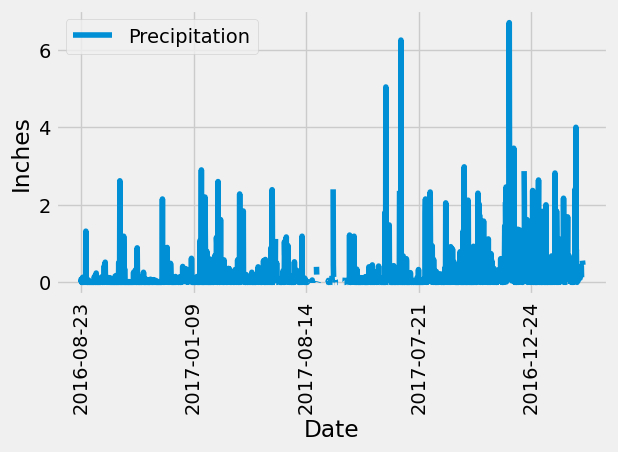

In [28]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_percip, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, xlabel='Date', ylabel='Inches')
plt.tight_layout()
plt.show()


In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [34]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

active_station

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

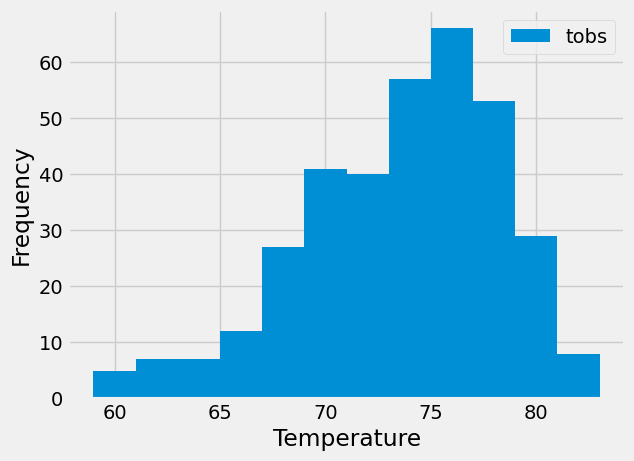

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_USC00519281 = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= start_date).all()
    
USC00519281_df = pd.DataFrame(station_USC00519281, columns=['tobs'])

USC00519281_df.plot.hist(bins=12)
plt.xlabel('Temperature')
# plt.show()

# Close Session

In [41]:
# Close Session
session.close()